In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
from scipy.io import loadmat
from matplotlib.axes import Axes
from sfoda.utils.othertime import datenum2datetime
from sfoda.utils.otherplot import axcolorbar
from matplotlib.dates import DateFormatter

In [47]:
plt.rcParams['font.size']=10
plt.rcParams['axes.labelsize']='x-small'
plt.rcParams['pcolor.shading']='auto'
plt.rcParams['xtick.labelsize']='small'
plt.rcParams['ytick.labelsize']='small'

In [14]:
matfile = '/home/jupyter-mrayson/data/UWA/Ningaloo2009/SBE39_synch_75m.mat'

data1 = loadmat(matfile)
dtime = np.array(datenum2datetime(data1['x4456'][0,:]))

ds_1sec = xr.DataArray(data1['x4456'][1,:], coords={'time':dtime })

matfile = '/home/jupyter-mrayson/data/UWA/Ningaloo2009/NLO_75m.mat'
data = loadmat(matfile)
time, temp, depth = data['T'][0][0]

dtime = np.array(datenum2datetime(time[0,:]))

ds = xr.DataArray(temp, coords={'height':depth[0,:],'time':dtime })
ds = ds.isel(height=[0,1,2,4,5,6,7,8,9,10,11,12, 14,15,16,17,18])
ds.name = ''
ds.attrs = {'units':'$^{\circ}$C'}

In [15]:
# t1 = "2023-07-06"
# t1 = "2024-04-16"
# vmin=50
# vmax=400

t1 = "2024-04-21"
vmin=100
vmax=400

# t1 = "2024-01-26"
# vmin=200
# vmax=900
# i1,i2 = 7800,8500
# j1,j2 = 8500,9200

# i1,i2 = 6000,8500 # Southern end
# j1,j2 = 8500,11000

i1,i2 = 6800,9000
j1,j2 = 7000,9500

# i1,i2 = 7500,9500
# j1,j2 = 5000,7500

# i1,i2 = 12200,13200
# j1,j2 = 2500,3500

outfile = f'..//SWOT_NAust/DATA/Sentinel2_L2A_B02_{t1}.nc'
dss = xr.open_dataset(outfile)


x = dss['x'].isel(x=[i1,i2])
y = dss['y'].isel(y=[j1,j2])
xbox = [x[0], x[1], x[1], x[0], x[0]]
ybox = [y[0], y[0], y[1], y[1], y[0]]



In [ ]:
from scipy.signal import convolve2d
z2 = dss['B02'].isel(t=0, x=slice(i1,i2, 1), y=slice(j1,j2,1)).copy()
#z = ds_area['sigma0'].copy()

zc = z2.values#+1j
zc[np.isnan(zc)] = 0.
# zf,_,_,_ = filter2d(zc, 1, 1, 20, 0, 359.999, n=1)
# z[:] = np.abs(zf)

N=3
z2[:] = convolve2d(zc, np.ones((N,N))/N**2, mode='same')


z = dss['B02'].isel(t=0, x=slice(None,None, 5), y=slice(None,None,5)).copy()
#z = ds_area['sigma0'].copy()

zc = z.values#+1j
zc[np.isnan(zc)] = 0.
# zf,_,_,_ = filter2d(zc, 1, 1, 20, 0, 359.999, n=1)
# z[:] = np.abs(zf)

N=8
z[:] = convolve2d(zc, np.ones((N,N))/N**2, mode='same')

/home/jupyter-mrayson/code/sfoda/sfoda/utils/otherplot.py:448: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()  # You call fig.tight_layout BEFORE creating the colorbar
/home/jupyter-mrayson/code/sfoda/sfoda/utils/otherplot.py:448: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()  # You call fig.tight_layout BEFORE creating the colorbar
/tmp/ipykernel_2184673/4003512730.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_2184673/4003512730.py:125: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


'FIGURES/NingalooSentinelBores_20091215080000.png'

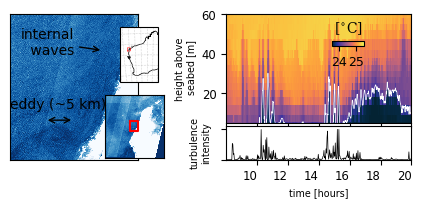

In [125]:
# vmin =200
# vmax = 275
vmin =200
vmax = 375
import cartopy.crs as ccrs
cmap = "cmo.thermal_r"
# cmap = "bone_r"
cmap = "Blues_r"

fig = plt.figure(figsize=(11.69/2.54, 5.55/2.54))

#ax3=plt.subplot(111)
ax3 = plt.subplot2grid((4,2),(0,0), rowspan=4)
# ax3 = fig.add_axes([0.05,0.05,0.5,0.8], projection=mapproj)

ax4 = fig.add_axes([0.22,0.25,0.29,0.29], )
# ds['B02'].isel(t=0, x=slice(7500,8500, 1), y=slice(8000,9000,1)).plot.imshow(vmin=100, vmax=300, cmap="Blues")
z.plot.imshow(ax=ax4,vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)

ax4.set_aspect('equal')
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
plt.plot(xbox, ybox, 'r-')
#plt.plot(113.93323333333333, -21.859933333333334,'md') # Nin 75 m
ax4.set_xticks([])
ax4.set_yticks([])
###
# Map inset
extent = [110,128,-38,-12]
mapproj = ccrs.Orthographic(123.0, -14)
ax2 = fig.add_axes([0.25,0.60,0.25,0.25], projection=mapproj)

ax2.gridlines(lw=0.4, ls=':')
ax2.coastlines(resolution='50m', lw=0.5)
#ax.fill(xybox[:,0],xybox[:,1],transform=mapproj)
#ax2.plot(0,0,'ro',transform=mapproj)


x1,y1,x2,y2 = [113, -23, 114.5, -21.5] # Ningaloo

xlims = [x1,x2]
ylims = [y1,y2]
xbox2 = [xlims[0], xlims[1],xlims[1], xlims[0], xlims[0]]
ybox2 = [ylims[0], ylims[0], ylims[1], ylims[1], ylims[0]]

ax2.plot(xbox2, ybox2,
         color='r', linewidth=0.4, marker='',
         transform=ccrs.Geodetic(), #remove this line to get straight lines
         )

ax2.set_extent(extent)

#ax3 = fig.add_axes([0.55,0.15,0.35,0.35], )
z2.plot.imshow(ax=ax3, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)
ax3.set_aspect('equal')

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title('')
ax3.set_xlabel('')
ax3.set_ylabel('')

#plt.tight_layout()

# outfile = f"FIGURES/NingalooSentinel2_{t1}_{cmap}.png"
# plt.savefig(outfile, dpi=150)
# outfile

####
t1,t2 = '2009-12-15 08:00:00', '2009-12-15 20:00:00'

# t1,t2 = '2009-11-11 00:00:00', '2009-11-12 00:00:00'

#fig, ax = plt.subplots(1,1, figsize=(7,4))
ax=plt.subplot2grid((4,2),(0,1),rowspan=3)
cc = ds.sel(time=slice(t1,t2)).plot(shading='flat', cmap='cmo.thermal', 
                               vmin=23.6, vmax=25.5,
                              #cbar_kwargs={"shrink": 0.3, 'pad':-0.1},
                               #cbar_kwargs={"shrink": 0.3, 'panchor':(0.1,0.7),
                               #             "orientation":'horizontal'},
                               add_colorbar=False
                              )
ds.sel(time=slice(t1,t2)).plot.contour(levels=[24], colors='w', linewidths=0.5)
ax.set_xlabel('')

ax.set_ylabel('height above\n seabed [m]')
#add_colorbar(ax, cc, 23.6, 25.5, '[$^{\circ}$C]')
cb = axcolorbar(
    cc,
    pos=[0.7, 0.8, 0.2, 0.04],
    ax=ax,
    fig=None,
    orientation='horizontal',
)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 10,
        }
#cb.set_ticks([vmin,vmax])
cb.ax.set_title('[$^{\circ}$C]', fontdict=font)
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.set_xticklabels([])
ax.set_ylim(5,60)

ax=plt.subplot2grid((4,2),(3,1),)
ds_1sec.sel(time=slice(t1,t2)).resample(time="120s").var().plot(c='k', lw=0.5)
ax.set_ylim(0,0.011)
t=ds.sel(time=slice(t1,t2))['time']
ax.set_xlim(t[0].values, t[-1].values)
ax.set_yticklabels([])
ax.set_ylabel('turbulence\nintensity')

# Define the date format
date_form = DateFormatter("%H")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('time [hours]')
plt.xticks(rotation=0)
plt.tight_layout()
plt.subplots_adjust( hspace=0.1)

ax3.annotate('internal\n waves',
            xy=(789000,7.545e6), xycoords='data',
            xytext=(790000-6e3,7.545e6+4e3), textcoords='data',
            #arrowprops=dict(facecolor='black', shrink=0.05),
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

ax3.annotate('',
            xy=(784000,7.533e6), xycoords='data',
            xytext=(784000-5e3,7.533e6), textcoords='data',
            #arrowprops=dict(facecolor='black', shrink=0.05),
            arrowprops=dict(arrowstyle="<->"),
            #horizontalalignment='right', verticalalignment='top'
            )
ax3.text(784000-11e3,7.533e6+2e3, 'eddy (~5 km)')

# ax3.annotate("", xy=(789000,7.535e6), xytext=(789000+5e3,7.535e6),
#             xycoords='data',textcoords='data',
#             arrowprops=dict(arrowstyle="<->"))

outfile = f"FIGURES/NingalooSentinelBores_{t1.replace('-',' ').replace(' ','').replace(':','')}.png"
plt.savefig(outfile, dpi=300, bbox_inches='tight')
outfile